# Исследование данных сервиса аренды самокатов GoFast и проверка гипотез, которые могут помочь бизнесу вырасти

В нашем распоряжении данные о некоторых пользователях из нескольких городов, а также об их поездках в рамках сервиса аренды самокатов GoFast. Задача проекта - проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
  - абонентская плата отсутствует;
  - стоимость одной минуты поездки — 8 рублей;
  - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
  - абонентская плата — 199 рублей в месяц;
  - стоимость одной минуты поездки — 6 рублей;
  - стоимость старта — бесплатно.

**Для решения поставленной задачи выполним следующее:**
- Загрузим и опишем данные
- Проведем предобработку данных, если это необходимо:
  - Приведем данные к общему виду
  - Изменим типы данных
  - Проверим данные на наличие пропусков и дубликатов и очистим от них данные


- Проведем исследовательский анализ данных:
  - Проверим данные на предмет наличия аномальных значений
  - Если это необходимо, добавим новые параметры в данные
  - Опишем и визуализируем общую информацию о пользователях и поездках. Исследуем следующие параметры:
    - частота встречаемости городов
    - соотношение пользователей с подпиской и без подписки
    - возраст пользователей
    - расстояние, которое пользователь преодолел за одну поездку
    - продолжительность поездок
    
    
- Проверим несколько гипотез, которые могут помочь бизнесу вырасти:
  - Тратят ли пользователи с подпиской больше времени на поездки чем пользователи без подписки?
  - Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 
  - Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

In [1]:
# Импортируем библиотеки, которые понадобятся нам для решения поставленных задач:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

## Описание данных

Данные представлены в нескольких файлах: 
- Пользователи — `***`
- Поездки — `***`
- Подписки — `***`

Прочитаем файлы и ознакомимся с общей информацией о датасетах методом `info()` и просмотрим первые несколько строк каждого датасета методом `head()`

In [2]:
# Сохраним данные в переменные: 'users', 'rides' и 'subs'
users = pd.read_csv('***')
rides = pd.read_csv('***')
subs = pd.read_csv('***')

In [3]:
# Ознакомимся с общей информацией в датасете 'users':
print(users.info())
users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


В датасете `users` представлены данные о пользователях (5 столбцов по 1 565 строк). Количество строк во всех колонках одинаково - пропусков в датасете нет. Дубликаты возможны в колонке `user_id`.

Приведем описание парметров пользователей:
- `user_id` — уникальный идентификатор пользователя
- `name` — имя пользователя
- `age` — возраст
- `city` — город
- `subscription_type` — тип подписки (free, ultra)

In [4]:
# Ознакомимся с общей информацией в датасете 'rides':
print(rides.info())
rides.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


В датасете `rides` представлены данные о поездках (4 столбца по 18 068 строк). Количество строк во всех колонках одинаково - пропусков в датасете нет.

Приведем описание парметров поездок:
- `user_id` — уникальный идентификатор пользователя
- `distance` — расстояние, которое пользователь проехал в текущей сессии (в метрах)
- `duration` — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- `date` — дата совершения поездки

In [5]:
# Ознакомимся с общей информацией в датасете 'subs':
print(subs.info())
subs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Датасет `subs` содержит всего 4 колонки и 2 строки и описывает параметры подписок:
- `subscription_type` — тип подписки
- `minute_price` — стоимость одной минуты поездки по данной подписке
- `start_ride_price` — стоимость начала поездки
- `subscription_fee` — стоимость ежемесячного платежа

### Результаты обзора данных

- В датасете `users` представлены данные о пользователях (5 столбцов по 1 565 строк). При первичном обзоре пропуски не обнаружены. При этом дубликаты возможны в параметре `user_id`.
- В датасете `rides` представлены данные о поездках (4 столбца по 18 068 строк). При первичном обзоре пропуски не обнаружены.
- Датасет `subs` содержит всего 4 колонки и 2 строки и описывает параметры подписок. Пропусков и дубликатов в датасете нет.

## Предобработка данных

Выполним пошагово следующие действия:
- Проверим наличие дубликатов и пропусков в данных и очистим от пропусков и дубликатов датасеты там где это возможно
- При необходимости изменим типы данных

### Работа с пропусками
При первичном обзоре данных пропуски в датасетах не были обнаружены. Теперь изучим данные подробнее:

In [6]:
# Проверим пропуски в датасете 'users':
print(f'Количество пропусков в датасете "users": {users.isna().sum().sum()}')

Количество пропусков в датасете "users": 0


In [7]:
# Проверим пропуски в датасете 'rides':
print(f'Количество пропусков в датасете "rides": {rides.isna().sum().sum()}')

Количество пропусков в датасете "rides": 0


Пропусков в датасетах `users` и `rides` нет.

### Работа с дубликатами

Удалим явные дубликаты (если они есть) из датасетов и проверим какое количество дубликатов было удалено:

In [8]:
# Обработаем дубликаты в датасете 'users':
count_users_before = len(users)
users = users.drop_duplicates().reset_index(drop=True)
count_users_after = len(users)
print(f'Количество удаленных явных дубликатов в датасете "users": {count_users_before - count_users_after}')

Количество удаленных явных дубликатов в датасете "users": 31


В датасете `users` были обнаружены и удалены явные дубликаты. При этом также возможны дубликаты в параметре `user_id`. Например, у двух или более пользователей `id` могут быть одинаковыми, изучим данные детальнее:

In [9]:
# Проверим наличие дубликатов в 'user_id':
users['user_id'].value_counts(ascending=False).head()

1       1
1020    1
1029    1
1028    1
1027    1
Name: user_id, dtype: int64

Дубликатов в параметре `user_id` нет

In [10]:
# Обработаем дубликаты в датасете 'rides':
count_rides_before = len(rides)
rides = rides.drop_duplicates().reset_index(drop=True)
count_rides_after = len(rides)
print(f'Количество удаленных явных дубликатов в датасете "rides": {count_rides_before - count_rides_after}')

Количество удаленных явных дубликатов в датасете "rides": 0


В датасете `rides` явные дубликаты не обнаружены.

### Оптимизация типов данных

Изменим тип данных в датасете `rides` в параметре `date` с `object` на более подходящий тип данных - `datetime`

In [11]:
#Изменим тип данных в 'date' с object на datetime:
rides['date'] = pd.to_datetime(rides['date'], format = '%Y-%m-%d')

In [12]:
# Проверим за какой период времени у нас представленны данные
rides['date'].min()
print(f'Данные в датасете "rides" охватывают период с {rides["date"].min()} по {rides["date"].max()}')

Данные в датасете "rides" охватывают период с 2021-01-01 00:00:00 по 2021-12-30 00:00:00


### Результаты предобработки данных

- В датасетах `users` и `rides` пропуски не обнаружены
- В датасете `users` удален 31 явный дубликат
- Изменен тип данных в `date` датасета `rides` с `object` на более подходящий тип данных - `datetime`

Данные в датасетах оказались довольно "чистыми".

## Исследовательский анализ данных

Для решения поставленных задач опишем и визуализируем общую информацию о пользователях и поездках:
- частота встречаемости городов
- соотношение пользователей с подпиской и без подписки
- возраст пользователей
- расстояние, которое пользователь преодолел за одну поездку
- продолжительность поездок


- Добавим новый столбец в датасет `rides` с номером месяца на основе столбца `date`
- Объединим датасеты `users`, `rides` и `subs` в единий датасет `data`
- На основе общего датасета создадим два датасета: с пользователями с подпиской - `data_ultra` и с пользователями без подписки - `data_free`
- Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий
- Расчитаем помесячную выручку, которую принёс каждый пользователь

### Частота встречаемости городов

Изучим количество городов представленных в датасете `users`, после чего сгруппируем данные в датасете `users` по городам и изучим количество пользователей в каждом из городов:

In [13]:
sorted(users['city'].unique())

['Екатеринбург',
 'Краснодар',
 'Москва',
 'Омск',
 'Пятигорск',
 'Ростов-на-Дону',
 'Сочи',
 'Тюмень']

Всего в данных представлены 8 городов:
- Екатеринбург
- Краснодар
- Москва
- Омск
- Пятигорск
- Ростов-на-Дону
- Сочи
- Тюмень

In [14]:
# Используем pivot_table() чтобы расчитать кольчество пользователей в каждом из городов и отсортируем данные по убыванию:  
cities = (
    users.pivot_table(
    index='city', values='user_id', aggfunc='count')
    .reset_index()
    .sort_values(by='user_id', ascending=False)
    )

# Изменим наименование колонок
cities.rename(columns={'user_id': 'users_count'}, inplace=True)

# Расчитаем долю пользователей для каждого города из общего количество пользователей:
cities['ratio'] = (cities['users_count'] / cities['users_count'].sum()).apply(lambda x: f'{x:.2%}')

# Ознакомимся с результатом:
cities

,city,users_count,ratio
4,Пятигорск,219,14.28%
0,Екатеринбург,204,13.30%
5,Ростов-на-Дону,198,12.91%
1,Краснодар,193,12.58%
6,Сочи,189,12.32%
3,Омск,183,11.93%
7,Тюмень,180,11.73%
2,Москва,168,10.95%


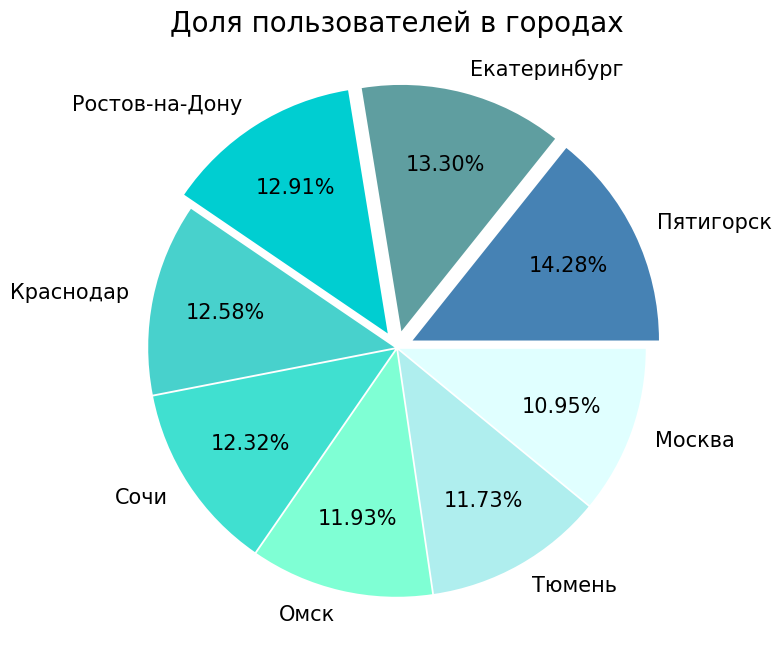

In [15]:
# Визуализируем результат:
plt.rcParams["figure.figsize"] = (8, 8)
colors = ['#4682B4', '#5F9EA0', '#00CED1', '#48D1CC', '#40E0D0', '#7FFFD4', '#AFEEEE', '#E0FFFF']
explode = (0.07, 0.07, 0.07, 0.01, 0.01, 0.01, 0.01, 0.01)
plt.pie(
    cities['users_count'], labels=cities['city'], autopct='%.2f%%', 
    pctdistance=0.7, colors=colors, explode=explode, textprops={'size': 15}, radius=1
)
plt.title('Доля пользователей в городах',  fontdict = {'fontsize' : 20})
plt.show()

По результатам можно сказать следующее:
- Больше всего пользователей в городе Пятигорск - 219 пользователей
- При этом пользователи распределены по городам равномерно, нет городов, в которых слишком мало или слишком много пользователей
- По мере убывания пользователей в каждом последующем городе кольчество пользователей снижается менее чем на 1%
- Разница между количеством пользователей в самом популярном (Пятигорск) и самом непопулярном городе (Москва) - 51 пользователь (3.33%)

### Соотношение пользователей с подпиской и без подписки

Сгруппируем пользователей по типу подписки и изучим их соотношение:

In [16]:
# Используем pivot_table() чтобы расчитать количество пользователей с подпиской и без подписки: 
users_ratio = (
    users.pivot_table(
    index='subscription_type', values='user_id', aggfunc='count')
    .reset_index()
    )

# Изменим наименование колонок
users_ratio.rename(columns={'user_id': 'users_count'}, inplace=True)

# Изменим subscription_type с "free" и "ultra" на "Без подписки" и "С подпиской" соответственно
users_ratio['subscription_type'] = users_ratio['subscription_type'].replace('free', 'Без подписки', regex=True)
users_ratio['subscription_type'] = users_ratio['subscription_type'].replace('ultra', 'С подпиской', regex=True)

# Расчитаем долю пользователей для каждого города из общего количество пользователей:
users_ratio['ratio'] = (users_ratio['users_count'] / users_ratio['users_count'].sum()).apply(lambda x: f'{x:.2%}')

# Ознакомимся с результатом:
users_ratio

,subscription_type,users_count,ratio
0,Без подписки,835,54.43%
1,С подпиской,699,45.57%


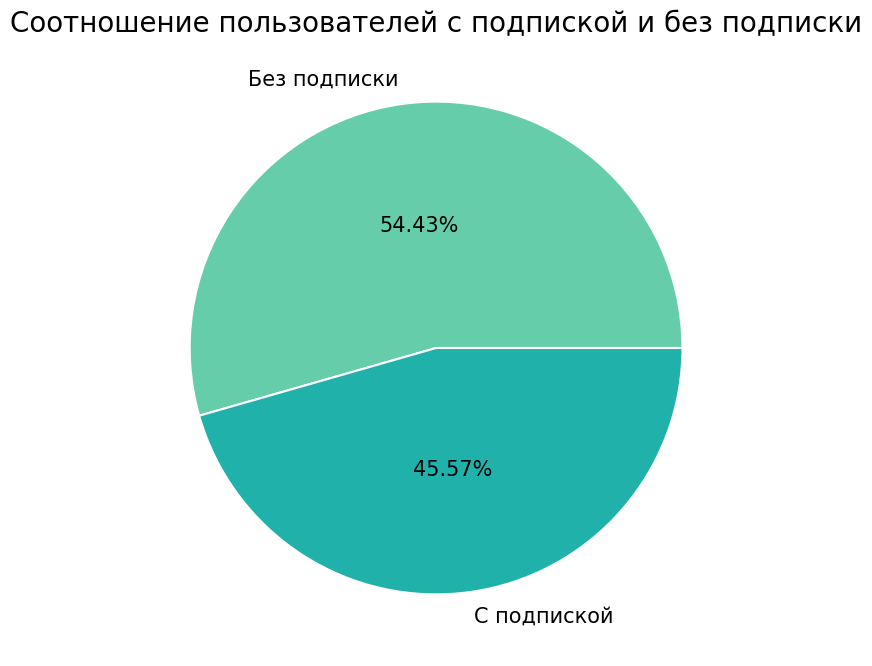

In [17]:
# Визуализируем результат:
plt.rcParams["figure.figsize"] = (8, 8)
plt.pie(
    users_ratio['users_count'], labels=users_ratio['subscription_type'], colors=['#66CDAA', '#20B2AA'], autopct='%.2f%%', 
    pctdistance=0.5, textprops={'size': 15}, radius=1, wedgeprops = { 'linewidth' : 1.5, 'edgecolor' : 'white' }
)
plt.title('Соотношение пользователей с подпиской и без подписки',  fontdict = {'fontsize' : 20})
plt.show()

Пользователей без подписки оказалось больше чем пользователей с подпиской, при этом разница составляет ~ 10%

### Возраст пользователей

Изучим возраст пользователей с помощью метода `describe()` и визуализируем данные с помощью гистограммы:

In [18]:
# Применим 'describe()' к users['age']:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Средний возраст пользователей ~ 25 лет, при этом самому младщему - 12 лет, а самому старшему - 43 года. 

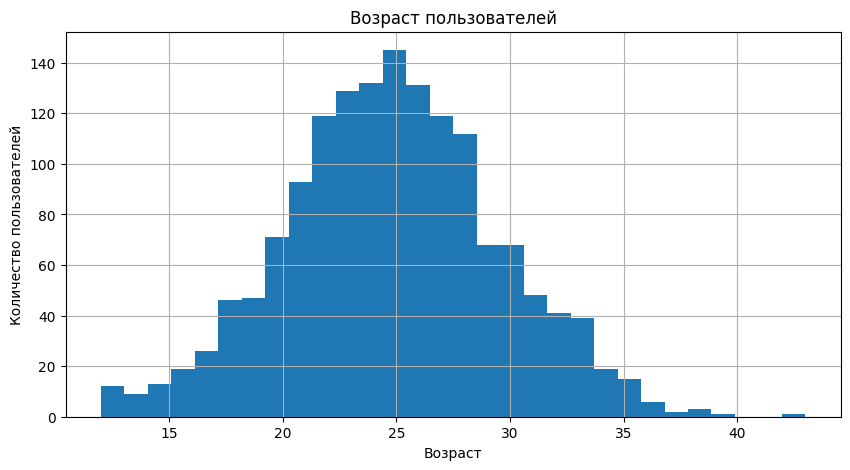

In [19]:
# Построим и изучим гистограмму по 'age'
plt.figure(figsize=(10, 5))
plt.hist(users['age'], bins=30)
plt.grid()
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

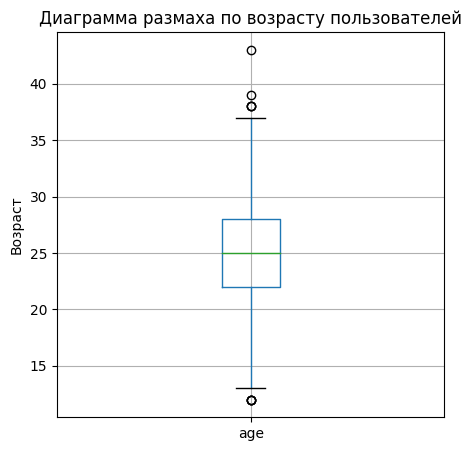

In [20]:
# Построим и изучим диаграмму размаха 'age':
users.boxplot('age', figsize=(5, 5))
plt.title('Диаграмма размаха по возрасту пользователей')
plt.ylabel('Возраст')
plt.show()

Данные о возрастах пользователей распределены нормально со средним значением в 25 лет.

### Расстояние, которое пользователь преодолевает за одну поездку

Изучим расстояние, которое преодолевают пользователи за одну поездку. Изучим числовые данные с помощью `describe()` и визуализируем данные:

In [21]:
# Применим метод describe()
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Среднее расстояние, которое преодолевают пользователи - 3 070 метров. При этом минимальное расстояние меньше метра. Данные выглядят неправдоподобно. Изучим короткие дистанции подробнее:

In [22]:
rides.sort_values(by='distance').head(20)

,user_id,distance,duration,date
11555,1069,0.855683,10.001902,2021-01-31
9541,925,2.570787,3.011018,2021-10-19
13690,1223,4.329506,4.008958,2021-05-22
8658,861,6.784447,6.015656,2021-07-21
7841,796,7.097072,10.026614,2021-11-26
8906,880,11.283615,2.035632,2021-03-28
8324,835,12.233115,4.034952,2021-09-19
13940,1240,15.000606,10.045002,2021-08-20
15626,1364,15.366168,6.057623,2021-08-22
11862,1091,15.630873,13.044660,2021-03-29


Нельзя сказать что данных с поездками на короткие дистанции дистанции единицы. Возможно это не аномальные значения, а пользователи, например, изучают приложение и делают первые шаги в изучении сервиса, совершают первые, короткие поездки на самокатах.

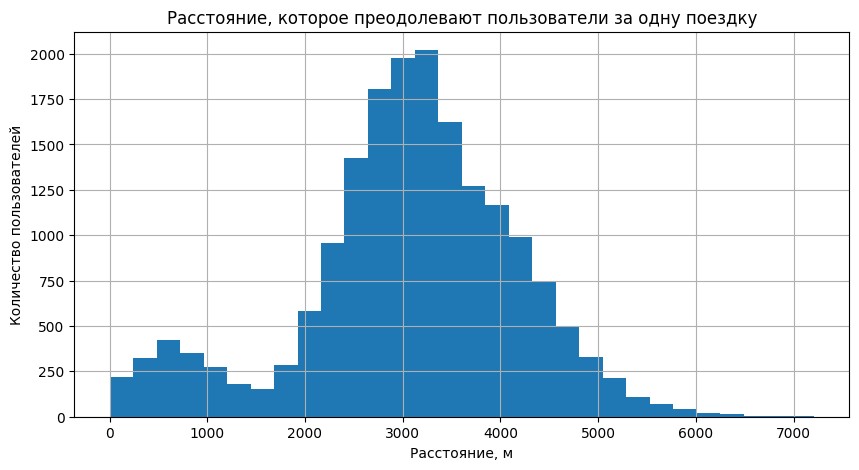

In [23]:
# Построим и изучим гистограмму по 'distance'
plt.figure(figsize=(10, 5))
plt.hist(rides['distance'], bins=30)
plt.grid()
plt.title('Расстояние, которое преодолевают пользователи за одну поездку')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')
plt.show()

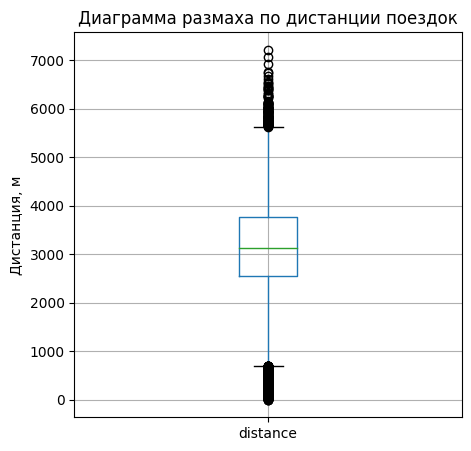

In [24]:
# Построим и изучим диаграмму размаха 'distance':
rides.boxplot('distance', figsize=(5, 5))
plt.title('Диаграмма размаха по дистанции поездок')
plt.ylabel('Дистанция, м')
plt.show()

На гистограмме наблюдается бимодальное распределение данных - пики значений приходятся на уровни ~ 700 метров в меньшей степени и в значительно большей степени на уровень в ~ 3100 - 3200 метров. Если удалить часть данных это может исказить данные о выручке и общие выводы исследования - все данные оставим.

### Продолжительность поездок

Изучим длительность поездок пользователей. Изучим числовые данные с помощью `describe()` и визуализируем данные:

In [25]:
# Применим метод describe()
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Среднее время поездок примерно 18 минут. При этом минимальное время поездок меньше минуты, кажется подозрительным. Проверим данные:

In [26]:
rides.sort_values(by='duration').head(10)

,user_id,distance,duration,date
12013,1102,4602.122401,0.5,2021-08-01
17314,1483,4445.481070,0.5,2021-03-06
15029,1318,5894.633314,0.5,2021-03-28
7437,766,4539.088310,0.5,2021-12-22
12967,1172,4907.140751,0.5,2021-12-19
15015,1317,4593.389022,0.5,2021-07-16
13012,1176,4935.071045,0.5,2021-05-14
7508,772,4718.820996,0.5,2021-05-22
16589,1428,5059.187375,0.5,2021-05-06
9049,890,4848.485014,0.5,2021-11-20


In [27]:
rides['duration'].value_counts().head()

0.500000     95
22.184080     1
25.866000     1
22.837062     1
19.173800     1
Name: duration, dtype: int64

95 поездок длительностью ровно 30 секунд! Установить причины таких значений, к сожалению, на данном этапе невозможно.

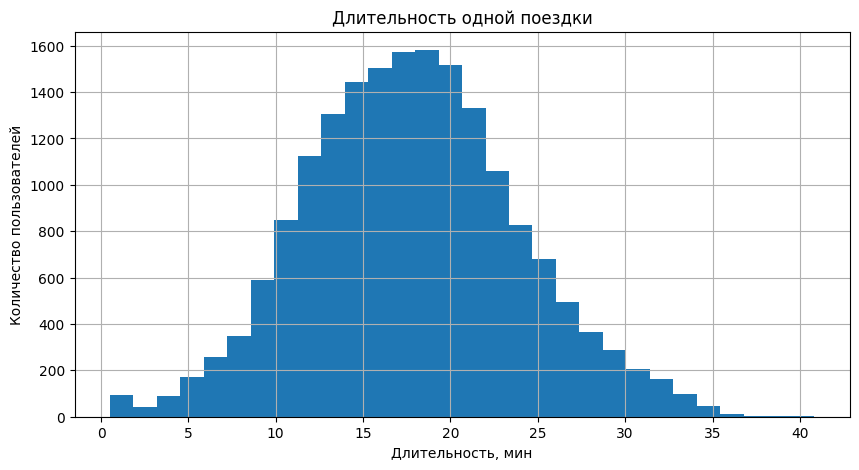

In [28]:
# Построим и изучим гистограмму по 'duration'
plt.figure(figsize=(10, 5))
plt.hist(rides['duration'], bins=30)
plt.grid()
plt.title('Длительность одной поездки')
plt.xlabel('Длительность, мин')
plt.ylabel('Количество пользователей')
plt.show()

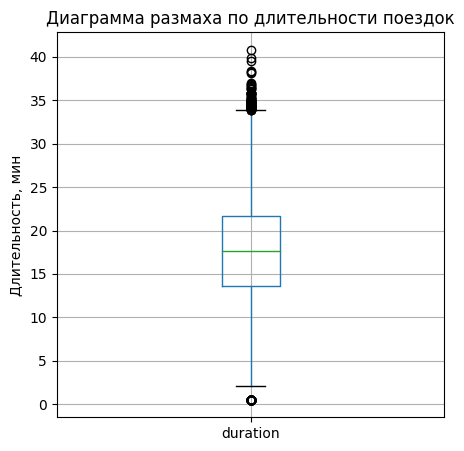

In [29]:
# Построим и изучим диаграмму размаха 'duration':
rides.boxplot('duration', figsize=(5, 5))
plt.title('Диаграмма размаха по длительности поездок')
plt.ylabel('Длительность, мин')
plt.show()

Данные распределены нормально, при этом есть уже указанное ранее выбивающееся значение в 30 секунд. Данные оставим.

### Добавление новых данных и объединение датасетов

Добавим новый столбец в датасет `rides` с номером месяца на основе столбца `date`. Объединим датасеты `users`, `rides` и `subs` в единий датасет `data`, и на основе общего датасета создадим два датасета: с пользователями с подпиской - `data_ultra` и с пользователями без подписки - `data_free`.

In [30]:
# создадим навый параметр в датасете 'rides' - месяц поездки
rides['month'] = rides['date'].dt.month

In [31]:
# объединим датасеты в один
data = users.merge(rides, on='user_id').merge(subs, on='subscription_type')

# ознакомимся с первыми строками нового датасета:
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [32]:
# Проверим данные в исходных датасетах и объединенном
print(f"Количество уникальных пользователей в датасете 'users': {len(users['user_id'].unique())}\n"
      f"Количество уникальных пользователей в датасете 'data': {len(data['user_id'].unique())}\n"
      f"\n"
      f"Количество поездок в датасете 'rides': {len(rides)}\n"
      f"Количество поездок в датасете 'data': {len(data)}\n")

if len(users['user_id'].unique()) == len(data['user_id'].unique()):
    print("Все данные из датасета 'user' перенесены в датасет 'data'")
else:
    print('Что-то пошло не так!')
if len(rides) == len(data):
    print("Все данные из датасета 'rides' перенесены в датасет 'data'")
else:
    print('Что-то пошло не так!')
    
print(f"\nКоличество пропущенных значений в датасете 'data': {data.isna().sum().sum()}")

Количество уникальных пользователей в датасете 'users': 1534
Количество уникальных пользователей в датасете 'data': 1534

Количество поездок в датасете 'rides': 18068
Количество поездок в датасете 'data': 18068

Все данные из датасета 'user' перенесены в датасет 'data'
Все данные из датасета 'rides' перенесены в датасет 'data'

Количество пропущенных значений в датасете 'data': 0


In [33]:
# создадим датасет с пользователями с подпиской:
data_ultra = data.query('subscription_type == "ultra"')

# ознакомимся с первыми строками нового датасета:
data_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [34]:
# создадим датасет с пользователями без подписки:
data_free = data.query('subscription_type == "free"')

# ознакомимся с первыми строками нового датасета:
data_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

In [35]:
# создадим функцию, которая будет принимать датасет а возвращать гистограмму по колонке 'distance', если она есть в датасете:
def distance_hist(df):
    try:
        plt.figure(figsize=(10, 5))
        plt.hist(df['distance'], bins=70)
        plt.grid()
        if 'ultra' in df['subscription_type'].unique():
            n = 'с подпиской'
        else:
            n = 'без подписки'
        plt.title(f'Расстояние, которое преодолевают пользователи {n} за одну поездку')
        plt.xlabel('Расстояние, м')
        plt.ylabel('Количество поездок')
        return plt.show()
    except:
        'Данные для постороения гистограммы не найдены.'

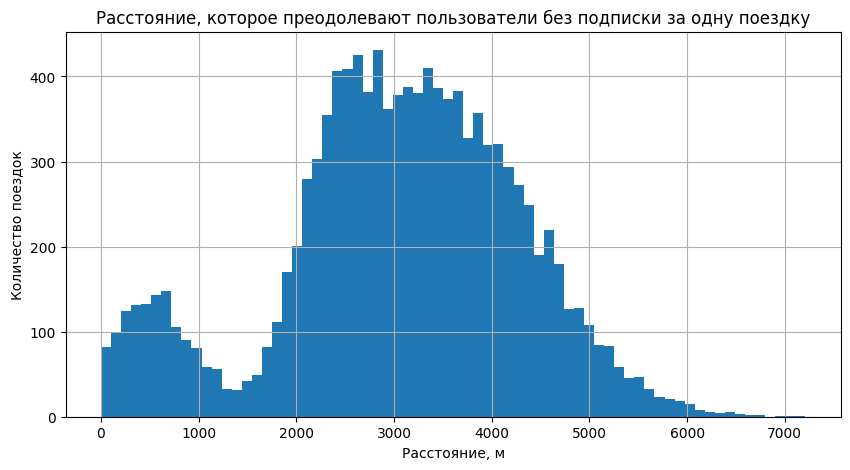

In [36]:
# Применим функцию к датасету с пользователями без подписки
distance_hist(data_free)

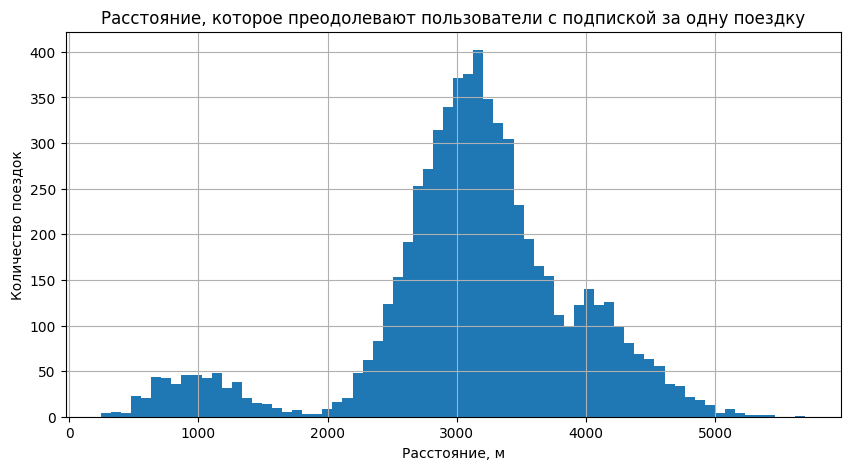

In [37]:
# Применим функцию к датасету с пользователями с подпиской
distance_hist(data_ultra)

Пользователи без подписки в среднем проезжают примерно от 2,5 до 3,5 километров. При этом достаточно много поездок и на короткие дистанции до 1 киллометра. Пользователи с подпиской проезжают в среднем 3 - 3,2 километра, а поездок на короткие дистанции значительно меньше чем у пользователей без подписки.

In [38]:
# создадим функцию, которая будет принимать датасет а возвращать гистограмму по колонке 'duration', если она есть в датасете:
def duration_hist(df):
    try:
        plt.figure(figsize=(10, 5))
        plt.hist(df['duration'], bins=50)
        plt.grid()
        if 'ultra' in df['subscription_type'].unique():
            n = 'с подпиской'
        else:
            n = 'без подписки'
        plt.title(f'Длительность одной поездки среди пользователей {n}')
        plt.xlabel('Длительность, мин')
        plt.ylabel('Количество поездок')
        return plt.show()
    except:
        'Данные для постороения гистограммы не найдены.'

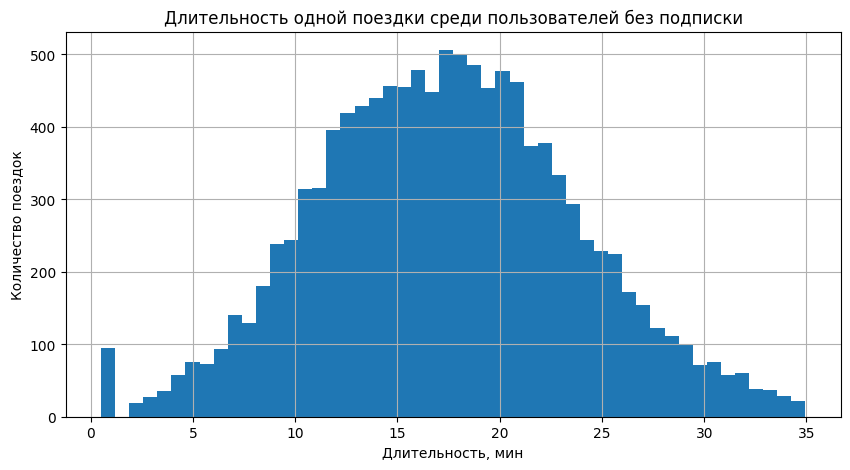

In [39]:
# Применим функцию к датасету с пользователями без подписки
duration_hist(data_free)

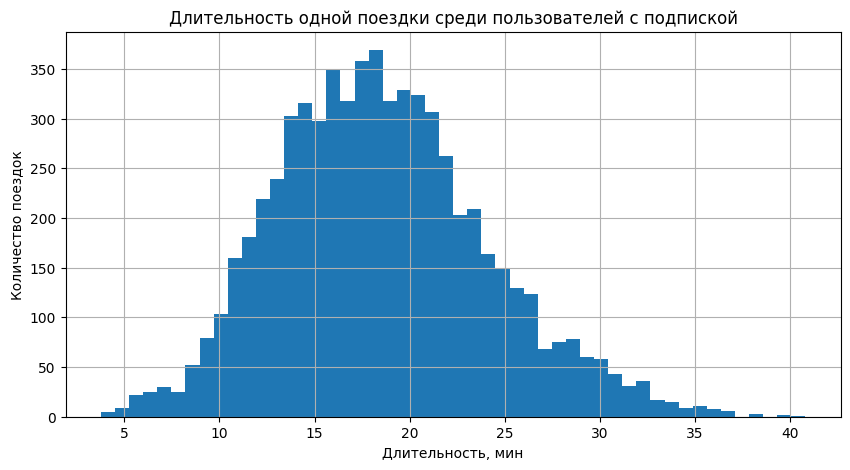

In [40]:
# Применим функцию к датасету с пользователями с подпиской
duration_hist(data_ultra)

Время поездок пользователей без подписки в среднем приходится на интервал от 13 до 21-22 минут, а время поездок пользователей с подпиской в среднем состовляет от 16 до 20 минут. Расброс значений у пользователей без подписки выше чем у пользователей с подпиской.

### Подсчёт выручки

Для расчета выручки найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Помесячную выручку расчитаем по формуле: 
- стоимость старта поездки ×  количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.

Стоимость одной минуты поездки списывается как только начинается отсчет новой минуты, поэтому значения из `duration` необходимо огруглить до большего значения, например, если поездка длилась 14,32 минуты то оплата будет за 15 минут а не за 14.

In [41]:
# каждое значение из столбца duration округляем до большего значения: 
data['duration'] = np.ceil(data['duration'])

In [42]:
# применим pivot_table() и найдем суммарное расстояние, 
# количество поездок и суммарное время для каждого пользователя за каждый месяц.
total_income = (
    data.pivot_table(
    index=['user_id', 'month'],
    values = ['distance', 'duration', 'name', 'subscription_type'],
    aggfunc = {
        'distance': sum, 
        'duration' : sum, 
        'name' : len, 
        'subscription_type' : min})
)

# Ознакомимкся с результатом
print(f"Количество пропущенных значений в сводной таблице 'total_income': {total_income.isna().sum().sum()}")
total_income.head(10)

Количество пропущенных значений в сводной таблице 'total_income': 0


distance  duration  name subscription_type
user_id month                                                
1       1       7027.511294      42.0     2             ultra
        4        754.159807       7.0     1             ultra
        8       6723.470560      46.0     2             ultra
        10      5809.911100      32.0     2             ultra
        11      7003.499363      56.0     3             ultra
        12      6751.629942      28.0     2             ultra
2       3      10187.723006      63.0     3             ultra
        4       6164.381824      40.0     2             ultra
        6       3255.338202      14.0     1             ultra
        7       6780.722964      48.0     2             ultra

In [43]:
# создадим функцию для расчета выручки по поездкам пользователей за каждый месяц в зависимости от типа подписки
def income_calculation(df):
    if df['subscription_type'] == 'free':
        return 50 * df['name'] + 8 *df['duration']
    elif df['subscription_type'] == 'ultra':
        return 6 * df['duration'] + 199

In [44]:
# создадим новый параметр "прибыль" и применим к нему гашу функцию
total_income['income'] = total_income.apply(income_calculation, axis=1)

# ознакомимся с результатом
total_income

distance  duration  name subscription_type  income
user_id month                                                        
1       1       7027.511294      42.0     2             ultra   451.0
        4        754.159807       7.0     1             ultra   241.0
        8       6723.470560      46.0     2             ultra   475.0
        10      5809.911100      32.0     2             ultra   391.0
        11      7003.499363      56.0     3             ultra   535.0
...                     ...       ...   ...               ...     ...
1534    6       3409.468534      26.0     2              free   308.0
        8       7622.453034      48.0     2              free   484.0
        9       4928.173852      23.0     1              free   234.0
        11     13350.015305      78.0     4              free   824.0
        12      2371.711192      16.0     1              free   178.0

[11331 rows x 5 columns]

### Результаты исследовательского анализа данных

- Больше всего пользователей в городе Пятигорск - 219 пользователей
- При этом пользователи распределены по городам равномерно, нет городов, в которых слишком мало или слишком много пользователей
- Пользователей без подписки оказалось больше чем пользователей с подпиской, при этом разница составляет ~ 10%
- Средний возраст пользователей 25 лет
- Поездки по расстоянию выделяются на уровне ~ 700 метров в меньшей степени (короткие поездки) и в значительно большей степени на уровене в ~ 3100 - 3200 метров (среднее значения расстояния)
- Средняя длительность поездок составляет 15 - 20 минут
- Была рассчитана помесячная выручка, которую принёс каждый пользователь

## Проверка гипотез

### Тратят ли пользователи с подпиской больше времени на поездки чем пользователи без подписки?

Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Для этого сформулируем нулевую (**H_0**) и альтернативную гипотезу(**H_1**):
- **H_0**: Пользователи с подпиской тратят время на поездки также как и пользователи без подписки
- **H_1**: Пользователи с подпиской трятят больше времени на поездки чем пользователи без подписки

Статистическая значимость - 5%

In [45]:
# Проверим одностороннюю гипотезу с помощью готового метода библиотеки SciPy
alpha = 0.05
results = st.ttest_ind(
    data_ultra['duration'], 
    data_free['duration'],
    alternative = 'greater',
    nan_policy='omit'
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.2804098316645613e-34
Отвергаем нулевую гипотезу


По результатам преверки нулевая гипотеза была отвергнута, что дает нам основание говорить о том что пользователи с подпиской действительно трятят больше времени на поездки чем пользователи без подписки.

### Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Проверим гипотезу. Для этого сформулируем нулевую (**H_0**) и альтернативную гипотезу(**H_1**):
- **H_0**: Пользователи с подпиской в среднем проезжают 3130 метров
- **H_1**: Пользователи с подпиской в среднем проезжают более 3130 метров

Статистическая значимость - 5%

In [46]:
# Проверим одностороннюю гипотезу с помощью готового метода библиотеки SciPy
alpha = 0.05
interested_value = 3130
results = st.ttest_1samp(
    data_ultra['distance'], 
    interested_value,
    alternative = 'greater'
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


По результатам преверки нулевая гипотеза не была отвергнута, поэтому у нас нет основания говорить о том что пользователи с подпиской действительно в среднем проезжают более 3130 метров за одну поездку.

### Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Проверим гипотезу. Для этого сформулируем нулевую (**H_0**) и альтернативную гипотезу(**H_1**):
- **H_0**: Помесячная выручка от пользователей с подпиской равна помесячной выручке от пользователей без подписки
- **H_1**: Помесячная выручка от пользователей с подпиской больше помесячной выручки от пользователей без подписки

Статистическая значимость - 5%

In [47]:
# Проверим одностороннюю гипотезу с помощью готового метода библиотеки SciPy
total_income_ultra = total_income.query('subscription_type == "ultra"')
total_income_free = total_income.query('subscription_type == "free"')
alpha = 0.05
results = st.ttest_ind(
    total_income_ultra['income'], 
    total_income_free['income'],
    alternative = 'greater'
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


По результатам преверки нулевая гипотеза была отвергнута, что дает нам основание говорить о том что помесячная выручка от пользователей с подпиской действительно больше помесячной выручки от пользователей без подписки.

**Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**

В этом примере необходимо сформулировать следующие нулевую и альтернативную гипотезу:

- **H_0**: Количество обращений в техподдержку не изменилось после обновления сервера (=)
- **H_1**: Количество обращений в техподдержку значимо снизилось после обновления сервера (<)

А для проверки используем готовый метод библиотеки SciPy `scipy.stats.ttest_rel()` с параметром `alternative = 'less'`. Этот метод подходит для проверки гипотез о равенстве среднего генеральной совокупности для зависимых (парных) выборок, как в нашем примере, до и после изменений.

## Общие выводы

Были проанализированы данные о некоторых пользователях из нескольких городов, а также об их поездках в рамках сервиса аренды самокатов GoFast и были получены следующие результаты:

- Больше всего пользователей в городе Пятигорск - 219 пользователей
- При этом пользователи распределены по городам равномерно, нет городов, в которых слишком мало или слишком много пользователей
- Пользователей без подписки оказалось больше чем пользователей с подпиской, при этом разница составляет ~ 10%
- Основная часть пользователей возрастом от 22 до 28 лет
- Поездки по расстоянию выделяются на уровне ~ до 1500 метров в меньшей степени (короткие поездки) и в значительно большей степени на уровене в ~ 2500 - 3800 метров (среднее значения расстояния)
- Средняя длительность поездок составляет 15 - 20 минут
- Была рассчитана помесячная выручка, которую принёс каждый пользователь


- Проверены несколько гипотез, которые могут помочь бизнесу вырасти:
  - **Тратят ли пользователи с подпиской больше времени на поездки чем пользователи без подписки?**
    - Есть основание говорить о том что пользователи с подпиской действительно трятят больше времени на поездки чем пользователи без подписки
  - **Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?**
    - Оснований говорить о том что пользователи с подпиской действительно в среднем проезжают более 3130 метров за одну поездку нет
  - **Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?**
    - Есть основание говорить о том что помесячная выручка от пользователей с подпиской действительно больше помесячной выручки от пользователей без подписки
    
**Рекомендации:**

Пользователей с подпиской немного меньше, тем не менее у компании-прокатчика есть неплохая база постоянных клиентов (45.57% из всех пользователей - это пользователи с подпиской) при этом как показало исследование: пользователи с подпиской приносят компании больше прибыли. Поэтому есть основания для рекомндации проведения маркетинговых акций, которые приведут к увеличению количества пользователей с подпиской.